In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import pandas as pd

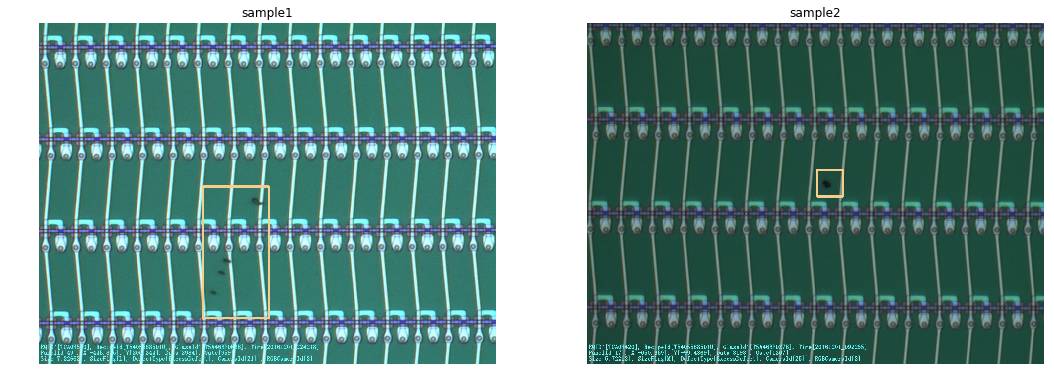

In [2]:
#원본 TFT-LCD 패널의 이미지 / 노란색 박스가 Defect의 위치이며 이 모양에 따라 Defect의 종류 결정

image_path = "./Data/samples/"
sample1 = cv2.imread(image_path + 'sample1_origin.jpg', cv2.COLOR_BGR2RGB)
cv2.rectangle(sample1, (500,500), (700,900), (246,205,139), 5)
sample2 = cv2.imread(image_path + 'sample2_origin.jpg', cv2.COLOR_BGR2RGB)
cv2.rectangle(sample2, (700,450), (780,530), (246,205,139), 5)

fig=plt.figure(figsize=(18, 10))
fig.add_subplot(1,2,1)
plt.title("sample1")
plt.axis('off')
plt.imshow(sample1)
fig.add_subplot(1,2,2)
plt.title("sample2")
plt.axis('off')
plt.imshow(sample2)
plt.show()

In [3]:
#배경 제거 : 그림과 같이 배경 패턴의 가로 길이가 일정하다는 점을 이용한 PD (Periodwise Differencing)을 활용하였음
#구체적인 코드는 공동 작업한 업체의 요청으로 공개 불가
#가시성을 위해 Defect 부분을 위주로 확대한 이미지 사용 예정

#1. Binary : Threshold를 적용하여 모든 부분을 0,255로 표현
sample_BIN = cv2.imread(image_path + 'sample1_BIN_crop.jpg', 0)

#2. Zero : PD 적용 이후 배경 부분에 대해서는 thresholding을 적용하지 않고, 결함 부분에만 적용하여 Defect와 패턴의 상대적
# 위치를 함께 고려
sample_Zero = cv2.imread(image_path + 'sample1_Zero_crop.jpg', 0)

#3. Trunc : PD 적용 이후 베경 부분만 threshold를 적용하여 Defect 주변 흐린 부분을 강조
sample_Trunc = cv2.imread(image_path + 'sample1_Trunc_crop.jpg', 0)

print('Trunc의 경우, 결함 부분 근처의 픽셀 값을 찍어보면 아래와 같습니다')
print(sample_Trunc[295:310,230:245])

Trunc의 경우, 결함 부분 근처의 픽셀 값을 찍어보면 아래와 같습니다
[[186 198 192 192 192 192 192 192 192 192 192 192 192 192 192]
 [130  88  41 117 179 181 209 190 188 198 177 212 183 183 199]
 [  0   0  29   0   0  17 139 190 196 189 210 181 192 196 187]
 [  0  10   0   0  13   3   5   2  68 155 183 183 197 199 184]
 [  0   0  15   7   0   2   6   0   0  20  83 193 193 190 193]
 [  5   0   1   0   0   2   6   4   0   0   7 126 187 190 196]
 [  5   1   0   3   0   3   0   6   2   0   1  13 188 199 189]
 [  0   0   1   0   0   7   0  14   4   0   9   0 192 194 191]
 [  0   5   5   1   0  11   0   1   0   4   0   6 195 177 201]
 [ 14   2   1   3   0   0   0   0   4   8   6   0 193 190 202]
 [  0   1   5   0   3  17   4   9   1   0   0  63 191 185 187]
 [ 16   0   0  10   2   0   0  11   0  16  39 159 191 192 185]
 [  0   3   5  10   5  12   0   9   1 130 147 210 185 198 195]
 [101  15   0   0   0   0   0 185 191 196 198 194 185 194 192]
 [187   0   8   0  26   0 202 181 185 194 195 177 202 194 182]]


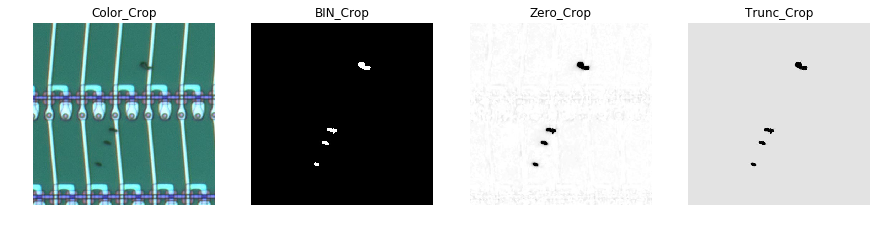

In [4]:
sample_crop = cv2.imread(image_path + 'sample1_Color_crop.jpg', cv2.COLOR_BGR2RGB)
fig=plt.figure(figsize=(15, 9))
fig.add_subplot(1,4,1)
plt.title("Color_Crop")
plt.axis('off')
plt.imshow(sample_crop)
fig.add_subplot(1,4,2)
plt.title("BIN_Crop")
plt.axis('off')
plt.imshow(sample_BIN, cmap='gray')
fig.add_subplot(1,4,3)
plt.title("Zero_Crop")
plt.axis('off')
plt.imshow(sample_Zero, cmap='gray')
fig.add_subplot(1,4,4)
plt.title("Trunc_Crop")
plt.axis('off')
plt.imshow(sample_Trunc, cmap='gray')

plt.show()


In [5]:
#sample1의 결함 정보
name = "18850_T5A46BP0KBB_TCAOH510_310_-445.836_205.344_O_L_20161201_224218.jpg"

feature = pd.read_csv("./Data/train_csv_data.csv")
feature = pd.DataFrame(feature)
where = -1
for idx, file_name in enumerate(feature["FILE_NAME"]):
    if name == file_name:
        where = idx
        break

print(feature.shape)
print(feature.iloc[where,0:15])

(2400, 22)
FILE_NAME                       18850_T5A46BP0KBB_TCAOH510_310_-445.836_205.34...
BLOBS_AREA_MEAN                                                            240.25
BLOBS_AREA_STDEV                                                          155.804
BLOBS_AREA_SUM                                                                961
BLOBS_AREA_VARIANCE                                                       24274.8
BLOBS_BRIGHTNESS_MAX                                                          224
BLOBS_BRIGHTNESS_MEAN                                                     95.8011
BLOBS_BRIGHTNESS_MIN                                                           65
BLOBS_BRIGHTNESS_STDEV                                                    32.8338
BLOBS_COUNT                                                                     4
MAXBLOB_ANGLE                                                            -60.6422
MAXBLOB_AREA                                                                  452
MAXBL

In [6]:
#이 정보를 활용하여 결함 Type의 분류 진행